A empresa tem que prever se pode ou não fazer um empréstimo pra quem está solicitando. O modelo tem que prever se aquela pessoa é boa pagadora ou má pagadora. 

Quando vc plota os gráficos das classes que tem nos dados, vemos que grande parte pagam os empréstimos 

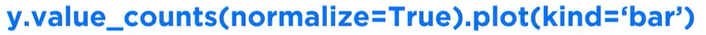

Será que se eu treinar o modelo de machine learn usando os dados é mais interessante falar que todas as pessoas pagam pq ele vai acertar mais e deixar passar as pessoas que não pagam ??!

Quando faz o modelo vemos que as métricas estão baixas, o recall está baixo por alguns modelos que foram criados. 

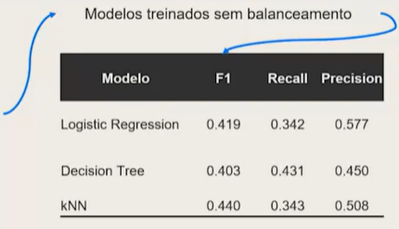

Como poderíamos melhorar?

U:ma das coisas que temos que entender é que os dados estão desbalanceados. O que é esse desbalanceamento ? 

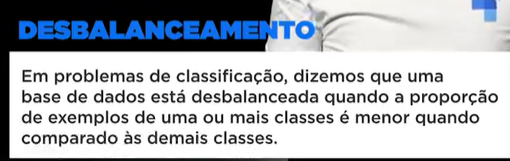

O desbalanceamento de classe não ocorre apenas quando se tem duas classe, pode ser quando se tem um número maior de classes. 

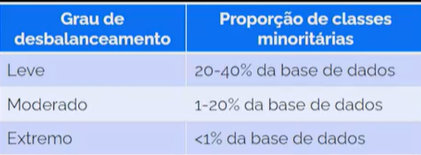

A classe é minoritária quando se trata da classe do menor número da base

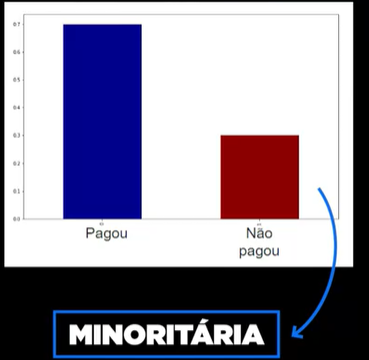

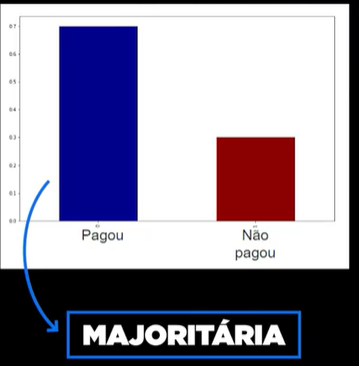

Um exemplo é a detecção de fraudes aonde o maior número de exemplos são de transações que não é fraude e menor de fraude. O modelo tem que ir lá e detectar essas fraudes, tem que evitar essas fraudes. Mas quando vc treina o modelo baseado em dados que estão muito desbalanceados é muito melhor pro modelo falar que todos os casos não são fraudes pq a maioria não é fraude. Precisamos tratar isso de alguma forma. 

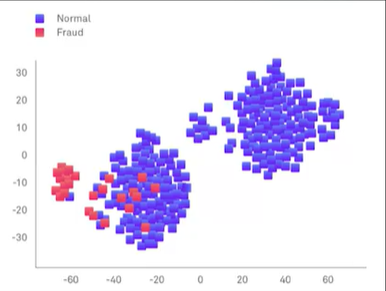

Outros exemplos na vida real aonde se encontra dados desbalanceados:

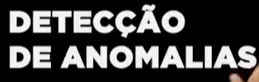

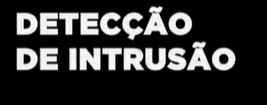

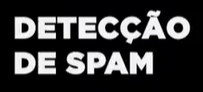

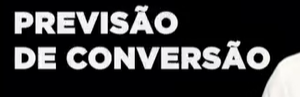

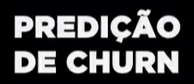

Como lidamos com dados que estão desbalanceados?

Umas das formas é utilizando técnicas de resampling

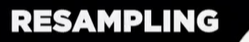

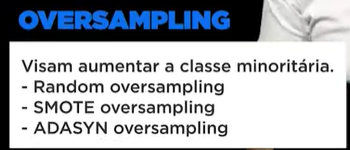

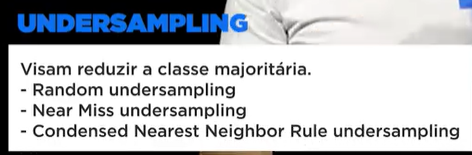

Pra fazer a implementação dessas duas técnicas acima, é necessário importar a biblioteca:

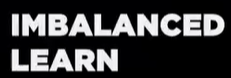

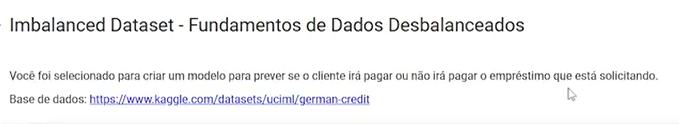

https://www.kaggle.com/datasets/uciml/german-credit?resource=download

Bibliotecas

In [69]:
import pandas as pd

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.pipeline import pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

Ingestão de dados

In [70]:
df = pd.read_csv('/content/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


index_col=0 pra dizer que a coluna Unnamed: 0 é o índice

In [71]:
df = pd.read_csv('/content/german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


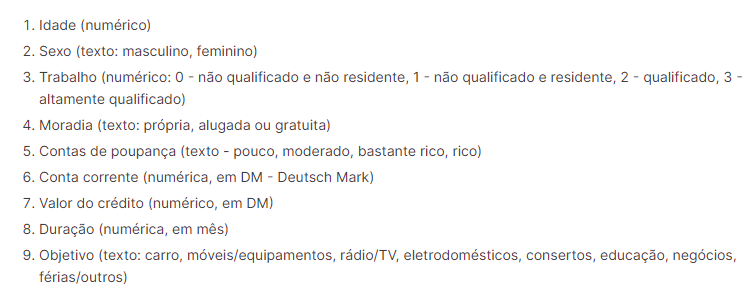

Vemos que temos variáveis de diferentes tipos: numéricas e categáricas. Vamos verificar o desbalanceamento.

In [72]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

Pra ver percentualmente

In [73]:
df['Purpose'].value_counts(normalize=True) * 100

car                    33.7
radio/TV               28.0
furniture/equipment    18.1
business                9.7
education               5.9
repairs                 2.2
domestic appliances     1.2
vacation/others         1.2
Name: Purpose, dtype: float64

Podemos ver de maneira visual

<Axes: >

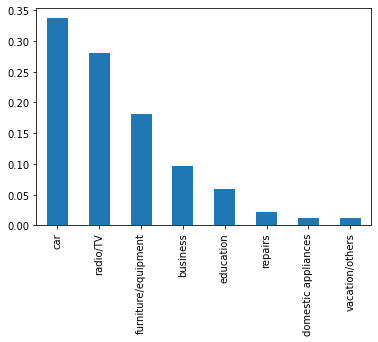

In [74]:
df['Purpose'].value_counts(normalize=True).plot(kind='bar') #, color=['blue', 'red', 'green', 'yellow', ])

Primeiro vamos fazer uma técnica de modelagem sem aplicar nenhuma técnica de rebalanceamento

Pra poder treinar esse modelo temos que fazer um pré-processamento dos dados. Logo vemos verificar os tipos de dados que temos:

In [75]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

Valores Vazios

In [76]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Train-Test-Split

O X vai ser todo dataset tirando a coluna 

A função .map é pra fazer um mapeamento, atribuir valores a cada variável categórica.

In [77]:
X =  df.drop(columns=['Purpose'])
y= df['Purpose'].map(('car':0, 'radio/TV':1, 'furniture/equipment':2, 'business':3, 'education':4, 'repairs':5, 'domestic appliances':6, 'vacation/others':7))

SyntaxError: ignored

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42, stratify=y)

Construção de Pipeline de pré-processamento:

Pra tratar os valores categóricos vamos usar o onehotenconding. Porém quando utilizandos o onehotenconding ele considera os valores nulos como se fosse uma nova categoria separada. Então o onehotenconding vai resolver esses dois problemas; 

Pra tratar os valores numéricos vamos usar o  standardScaling;

selector() pra selecionar as colunas que queremos

selector(dtype_include='int') selecionar só os tipos que são numéricos

OneHotEncoder(drop='first', handle _unknown='ignore', sparse=False) --> quando for fazer o OneHotEncoder, exclua a primeira coluna e quando ele encontrar um valor desconhecido vai ignorar esse valor e como resultado não vou querer uma matriz esparsa

In [ ]:
preprocessing = ColumnTransformer(
    transformers= [
        ('ohe', OneHotEncoder(drop='first', handle _unknown='ignore', sparse=False), selector(dtype_include='object')),
        ('std', StandardScaler(), selector(dtype_include='int64'))
    ]
)

Na modelagem vamos usar 03 algortimos:

1- Regrassão Logistica;

2- KNN;

3- Decision Tree

Primeiro vamos fazer o pré-processamentos dos dados e depois aplicar modelagem usando regressão logistica

In [ ]:
pipe_LR = PipeLine([
    ('pp', preprocessing),
    ('LR', LogisticRegression(random_state=42))
])

Agora vamos montar o mesmo pipeline pra os demais algoritmos:

KNN

In [ ]:
pipe_KNN = PipeLine([
    ('pp', preprocessing),
    ('KNN', KNeighborsClassifier())
])

Decision Tree

In [ ]:
pipe_DT = PipeLine([
    ('pp', preprocessing),
    ('DT', DecisionTreeClassifier(random_state=42))
])

Avaliação dos modelos

StratifiedKFold é pra obter a mesma divisão pra todos os modelos, fazer uma comparação justa, pra isso passamos os números de splits, 

In [ ]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

Quando for implementar o cross_validate precisamos de um estimate que é o pipe_LR, depois X e y train, scoring F1 pq ele é um bom balanceamento entre o recall e o precision, funciona bem com dados desbalanceados. 

In [ ]:
res = cross_validate(pipe_LR, X_train, y_train, scoring='f1', cv=skf, return_train_score=True)

OBSERVAÇÃO: NÃO PODE TER DUAS ASPAS SIMPLES NA MESMA LINHA, DA PROBLEMA

LR

In [ ]:
print(f'F1 TRAIN: {res["train_score"].mean():.4}')
print(f'F1 Test: {res["train_score"].mean():.4}')


KNN

In [ ]:
res = cross_validate(pipe_KNN, X_train, y_train, scoring='f1', cv=skf, return_train_score=True)

In [ ]:
print(f'F1 TRAIN: {res["train_score"].mean():.4}')
print(f'F1 Test: {res["train_score"].mean():.4}')

DT

In [ ]:
res = cross_validate(pipe_DT, X_train, y_train, scoring='f1', cv=skf, return_train_score=True)

In [ ]:
print(f'F1 TRAIN: {res["train_score"].mean():.4}')
print(f'F1 Test: {res["train_score"].mean():.4}')